<a href="https://colab.research.google.com/github/surajgazi100/Feature_engineering_/blob/main/One_Hot_Encoding_in_Python_with_Pandas_and_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
In computer science, data can be represented in a lot of different ways, and naturally, every single one of them has its advantages as well as disadvantages in certain fields.

Since computers are unable to process categorical data as these categories have no meaning for them, this information has to be prepared if we want a computer to be able to process it.

This action is called preprocessing. A big part of preprocessing is encoding - representing every single piece of data in a way that a computer can understand (the name literally means "convert to computer code").

In many branches of computer science, especially machine learning and digital circuit design, One-Hot Encoding is widely used.

In this article, we will explain what one-hot encoding is and implement it in Python using a few popular choices, Pandas and Scikit-Learn. We'll also compare it's effectiveness to other types of representation in computers, its strong points and weaknesses, as well as its applications.

What is One-Hot Encoding?
One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one, which has 1 as its value, where 1 represents a boolean specifying a category of the element.

There also exists a similar implementation called One-Cold Encoding, where all of the elements in a vector are 1, except for one, which has 0 as its value.

For instance, [0, 0, 0, 1, 0] and [1 ,0, 0, 0, 0] could be some examples of one-hot vectors. A similar technique to this one, also used to represent data, would be dummy variables in statistics.

This is very different from other encoding schemes, which all allow multiple bits to have 1 as its value. Below is a table that compares the representation of numbers from 0 to 7 in binary, Gray code, and one-hot:



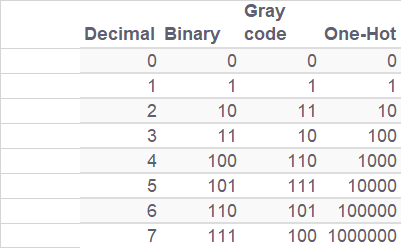

Practically, for every one-hot vector, we ask n questions, where n is the number of categories we have:

Is this the number 1? Is this the number 2? ... Is this the number 7?

Each "0" is "false" and once we hit a "1" in a vector, the answer to the question is "true".

One-hot encoding transforms categorical features to a format that works better with classification and regression algorithms. It's very useful in methods where multiple types of data representation is necessary.

For example, some vectors may be optimal for regression (approximating functions based on former return values), and some may be optimal for classification (categorization into fixed sets/classes, typically binary):



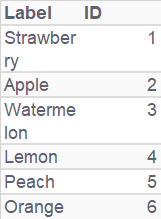

Here we have six sample inputs of categorical data. The type of encoding used here is called "label encoding" - and it is very simple: we just assign an ID for a categorical value.

Our computer now knows how to represent these categories, because it knows how to work with numbers. However, this method of encoding is not very effective, because it tends to naturally give the higher numbers higher weights.

It wouldn't make sense to say that our category of "Strawberries" is greater or smaller than "Apples", or that adding the category "Lemon" to "Peach" would give us a category "Orange", since these values are not ordinal.

If we represented these categories in one-hot encoding, we would actually replace the rows with columns. We do this by creating one boolean column for each of our given categories, where only one of these columns could take on the value 1 for each sample:

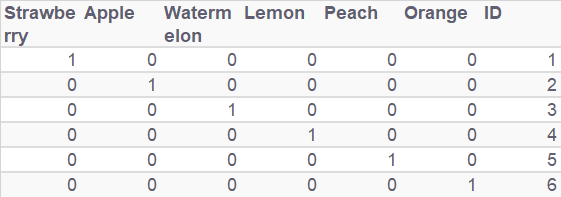

We can see from the tables above that more digits are needed in one-hot representation compared to Binary or Gray code. For n digits, one-hot encoding can only represent n values, while Binary or Gray encoding can represent 2n values using n digits.

Implementation
Pandas
Let's take a look at a simple example of how we can convert values from a categorical column in our dataset into their numerical counterparts, via the one-hot encoding scheme.

We'll be creating a really simple dataset - a list of countries and their ID's:

In [1]:
import pandas as pd

ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Spain', 'France', 'Spain', 'Germany', 'France']

df = pd.DataFrame(list(zip(ids, countries)),
                  columns=['Ids', 'Countries'])

In [3]:
df.head()

,Ids,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [2]:
y = pd.get_dummies(df.Countries, prefix='Country')
print(y.head())

   Country_France  Country_Germany  Country_Spain
0               0                0              1
1               1                0              0
2               0                0              1
3               0                1              0
4               1                0              0


We passed Country as the value for the prefix attribute of the get_dummies() method, hence you can see the string Country prefixed before the header of each of the one-hot encoded columns in the output.

Scikit-Learn
An alternative would be to use another popular library - Scikit-Learn. It offers both the OneHotEncoder class and the LabelBinarizer class for this purpose.

First, let's start by importing the LabelBinarizer:

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
y = LabelBinarizer().fit_transform(df.Countries)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


# Applications of One-Hot Encoding
One-hot encoding has seen most of its application in the fields of Machine Learning and Digital Circuit Design.
# New Section
# Machine Learning
As stated above, computers aren't very good with categorical data. While we understand categorical data just fine, it's due to a kind of prerequisite knowledge that computers don't have.

Most Machine Learning techniques and models work with a very bounded dataset (typically binary). Neural networks consume data and produce results in the range of 0..1 and rarely will we ever go beyond that scope.


In short, the vast majority of machine learning algorithms receive sample data ("training data") from which features are extracted. Based on these features, a mathematical model is created, which is then used to make predictions or decisions without being explicitly programmed to perform these tasks.

A great example would be Classification, where the input can be technically unbounded, but the output is typically limited to a few classes. In the case of binary classification (say we're teaching a neural network to classify cats and dogs), we'd have a mapping of 0 for cats, and 1 for dogs.

Most of the time, the training data we wish to perform predictions on is categorical, like the example with fruit mentioned above. Again, while this makes a lot of sense to us, the words themselves are of no meaning to the algorithm as it doesn't understand them.

Using one-hot encoding for representation of data in these algorithms is not technically necessary, but pretty useful if we want an efficient implementation.

#Digital Circuit Design
Many basic digital circuits use one-hot notation in order to represent their I/O values.

For example, it can be used to indicate the state of a finite-state machine. If some other type of representation, like Gray or Binary, is used, a decoder is needed to determine the state as they're not as naturally compatible. Contrarily, a one-hot finite-state machine does not need the decoder, because if the nth bit is high, the machine is, logically, in the nth state.

A good example of a finite-state machine is a ring counter - a type of counter composed of flip-flops connected to a shift register, in which the output of one flip-flop connects to the input of the other one.

The first flip-flop in this counter represents the first state, the second represents the second state, and so on. At the beginning, all of the flip-flops in the machine are set to '0', except for the first one, which is set to '1'.

The next clock edge arriving at the flip flops advances the one 'hot' bit to the second flip flop. The 'hot' bit advances like this until the last state, after which the machine returns to the first state.

Another example of usage of one-hot encoding in digital circuit design would be an address decoder, which takes a Binary or Gray code input, and then converts it to one-hot for the output, as well as a priority encoder (shown in the picture below).

It's the exact opposite and takes the one-hot input and converts it to Binary or Gray:

#digital circuit design

Advantages and Disadvantages of One-hot encoding
Like every other type of encoding, one-hot has many good points as well as problematic aspects.

#Advantages
A great advantage of one-hot encoding is that determining the state of a machine has a low and constant cost, because all it needs to do is access one flip-flop. Changing the state of the machine is almost as fast, since it just needs to access two flip-flops.

Another great thing about one-hot encoding is the easy implementation. Digital circuits made in this notation are very easy to design and modify. Illegal states in the finite-state machine are also easy to detect.

A one-hot implementation is known for being the fastest one, allowing a state machine to run at a faster clock rate than any other encoding of that state machine.

#Disadvantages
One of the main disadvantages that one-hot encoding has is the above mentioned fact that it can't represent many values (for n states, we would need n digits - or flip-flops). This is why, if we wanted to implement a one-hot 15-state ring counter for example, we would need 15 flip-flops, whereas the binary implementation would only need three flip-flops.

This makes it especially impractical for PAL devices, and it can also be very expensive, but it takes advantage of an FPGA's abundant flip-flops.

Another problem with this type of encoding is that many of the states in a finite-state machine would illegal - for every n valid states, there is (2n - n) illegal ones. A good thing is that these illegal states are, as previously said, really easy to detect (one XOR gate would be enough), so it's not very hard to take care of them.

#Conclusion
Since one-hot encoding is very simple, it is easy to understand and use in practice. It's no surprise that it is this popular in the world of computer science.

Due to the fact that the cons aren't too bad, its seen wide application. At the end of the day, its pros clearly outweigh the cons, which is why this type of implementation will definitely stick around for a long time in the future.